# Importing required Libraries

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.naive_bayes import MultinomialNB

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# Loading the DataSet

In [7]:
df=pd.read_csv('C:/Users/hp/OneDrive/Desktop/spam.csv', encoding='ISO-8859-1')

In [8]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# Preprocessing the DataSet

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.columns=['label', 'c1','c2','c3','c4']
df.head(1)

,label,c1,c2,c3,c4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN


In [11]:
df.fillna(' ', inplace=True)

In [12]:
df['text']=df['c1']+' '+df['c2']+' '+df['c3']+' '+df['c4']
df.drop(columns=['c1','c2','c3','c4'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                       Sorry, I'll call later         30
spam    747    653  Please call our customer service representativ...    4

In [15]:
df['length']=df['text'].apply(len)
df.head(3)

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",117
1,ham,Ok lar... Joking wif u oni...,35
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,161


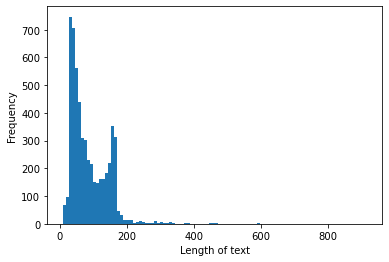

In [16]:
df['length'].plot.hist(bins=100)
plt.xlabel('Length of text')
plt.show()

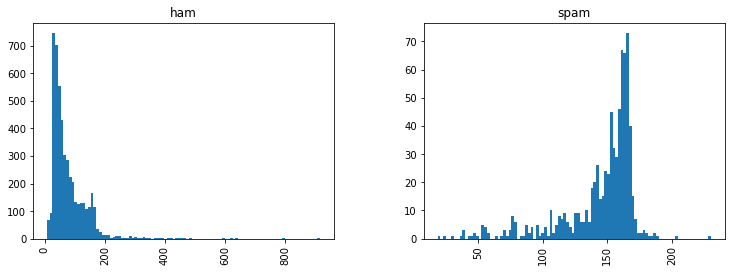

In [17]:
df.hist(column='length',by='label', bins=100, figsize=(12,4))
plt.show()

In [18]:
ham_msg = df[df['label'] =='ham']
spam_msg = df[df['label']=='spam']
ham_msg_text = " ".join(ham_msg.text.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.text.to_numpy().tolist())

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
name='Hi! I am Senan.'
name=[c for c in name if c not in string.punctuation]
name=''.join(name)
name

'Hi I am Senan'

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
name.split()

['Hi', 'I', 'am', 'Senan']

In [29]:
clean=[word for word in name.split() if word.lower() not in stopwords.words('english')]
clean

['Hi', 'Senan']

In [30]:
def process_txt(data):
    nopunc=[char for char in data if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
transformer1=CountVectorizer(analyzer=process_txt).fit(df['text'])
len(transformer1.vocabulary_)

11426

In [34]:
a=df['text'][1]
a

'Ok lar... Joking wif u oni...      '

In [35]:
b=transformer1.transform([a])
print(b)

  (0, 2455)	1
  (0, 3068)	1
  (0, 7703)	1
  (0, 8591)	1
  (0, 10698)	1
  (0, 11073)	1


In [36]:
print(b.shape)

(1, 11426)


In [37]:
transformer1.get_feature_names()[2455]

'Joking'

In [39]:
transformed=transformer1.transform(df['text'])
transformed.shape

(5572, 11426)

In [40]:
print('Sparsity:', 1-(100.0 * transformed.nnz/(transformed.shape[0]*transformed.shape[1])))

Sparsity: 0.9205945709643967


In [41]:
tfidf_transformer = TfidfTransformer().fit(transformed)
transformed2=tfidf_transformer.transform(b)
print(transformed2)

  (0, 11073)	0.40061560982443056
  (0, 10698)	0.2063637481323008
  (0, 8591)	0.5043405901305854
  (0, 7703)	0.3767401070812794
  (0, 3068)	0.2911995411244838
  (0, 2455)	0.561988811929381


In [44]:
df_tfidf=tfidf_transformer.transform(transformed)

# Modelling

In [45]:
spam_model = MultinomialNB().fit(df_tfidf, df['label'])
spam_model.predict(transformed2)

array(['ham'], dtype='<U4')

In [46]:
df['label'][1]

'ham'

In [48]:
prd=spam_model.predict(df_tfidf)
prd

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Splitting Data

In [50]:
train_x, test_x, train_y, test_y =train_test_split(df['text'], df['label'], test_size=0.3, random_state=25)


pipeline=Pipeline([
    ('bow', CountVectorizer(analyzer=process_txt)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


pipeline.fit(train_x, train_y)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process_txt at 0x0000022905CD8D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

# Evaluating Performance Of the Model

In [52]:
pred=pipeline.predict(test_x)
print(classification_report(test_y, pred))
print('Accuracy score: ',accuracy_score(test_y, pred))
print()
print('Balanced Accuracy score: ',balanced_accuracy_score(test_y, pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1429
        spam       1.00      0.68      0.81       243

    accuracy                           0.95      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.95      0.95      1672

Accuracy score:  0.9539473684210527

Balanced Accuracy score:  0.8415637860082305
